In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from fitter import Fitter

In [5]:
df_dd = pd.read_csv('/home/phiofs/Documentos/GitHub/ms-dscience/data/flights.csv')
df_dd.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


## Depuracion de la df

In [6]:
# Analisis de dimension
df_dd.shape

(271940, 20)

In [11]:
# Revisa si hay algun valor nulo en cada columna
for i in df_dd.columns:
    if any(df_dd[i].isnull()):
        print(f"Existe algun valor nulo en la columna {i}")

Existe algun valor nulo en la columna DepDel15


In [16]:
# Revisa cuantos valores nulos hay en depdelay15
df_dd.DepDel15[df_dd.DepDel15.isnull()].shape

(2761,)

In [17]:
df_dd[df_dd.DepDel15.isnull()].head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
171,2013,4,18,4,DL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,13930,Chicago O'Hare International,Chicago,IL,835,0,NaN,945,0,1,1
359,2013,5,22,3,OO,11433,Detroit Metro Wayne County,Detroit,MI,13930,Chicago O'Hare International,Chicago,IL,1719,0,NaN,1738,0,1,1
429,2013,7,3,3,MQ,13851,Will Rogers World,Oklahoma City,OK,13930,Chicago O'Hare International,Chicago,IL,1935,0,NaN,2125,0,1,1
545,2013,4,13,6,FL,14524,Richmond International,Richmond,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,630,0,NaN,809,0,1,1
554,2013,5,8,3,EV,12953,LaGuardia,New York,NY,11193,Cincinnati/Northern Kentucky International,Cincinnati,OH,1320,0,NaN,1524,0,1,1


- Como **DepDel15** esta relacionada con DepDelay se realiza la hipotesis de que no hay valor en DepDel15 porque DepDelay es 0.0

In [21]:
df_dd.DepDelay.describe()

count    271940.000000
mean         10.350449
std          35.673710
min         -63.000000
25%          -4.000000
50%          -1.000000
75%           9.000000
max        1425.000000
Name: DepDelay, dtype: float64

In [24]:
df_dd[df_dd.DepDelay <= 0].head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
6,2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,William P Hobby,Houston,TX,630,-1,0.0,1210,-3,0,0
14,2013,10,20,7,AS,14107,Phoenix Sky Harbor International,Phoenix,AZ,14747,Seattle/Tacoma International,Seattle,WA,1330,-11,0.0,1628,-15,0,0
15,2013,4,14,7,AA,12892,Los Angeles International,Los Angeles,CA,13830,Kahului Airport,Kahului,HI,1730,-7,0.0,2010,26,1,0


- Se comprueba exitosamente la existencia de valores de 0 para DepDelay menores que 0, entonces podemos cambiar los valores perdidos de DepDel15 por 0

In [25]:
df_dd.DepDel15.fillna(0, inplace=True)

In [27]:
df_dd.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

### Realicemos un analisis de los valores de la columna DepDelay y ArrDelay

In [28]:
df_dd.DepDelay.describe()

count    271940.000000
mean         10.350449
std          35.673710
min         -63.000000
25%          -4.000000
50%          -1.000000
75%           9.000000
max        1425.000000
Name: DepDelay, dtype: float64

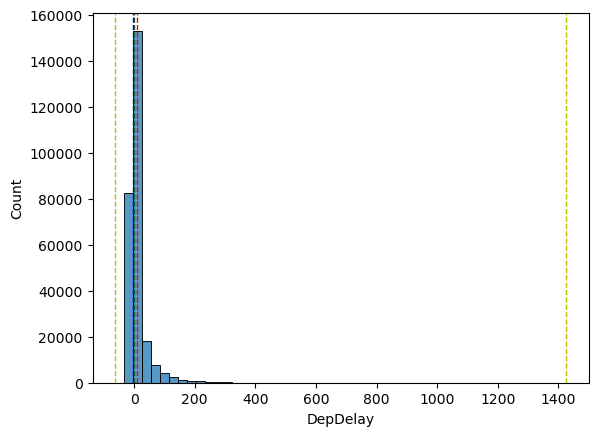

In [52]:
sns.histplot(df_dd.DepDelay, bins=50)
# colocar la media moda y mediana en el histograma
plt.axvline(df_dd.DepDelay.mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(df_dd.DepDelay.median(), color='g', linestyle='dashed', linewidth=1)
plt.axvline(df_dd.DepDelay.mode()[0], color='b', linestyle='dashed', linewidth=1)
plt.axvline(df_dd.DepDelay.max(), color='y', linestyle='dashed', linewidth=1)
plt.axvline(df_dd.DepDelay.min(), color='y', linestyle='dashed', linewidth=1)

/home/phiofs/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DepDelay'>

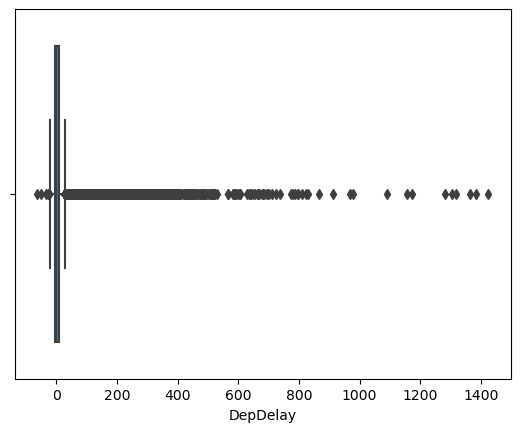

In [53]:
sns.boxplot(df_dd.DepDelay)

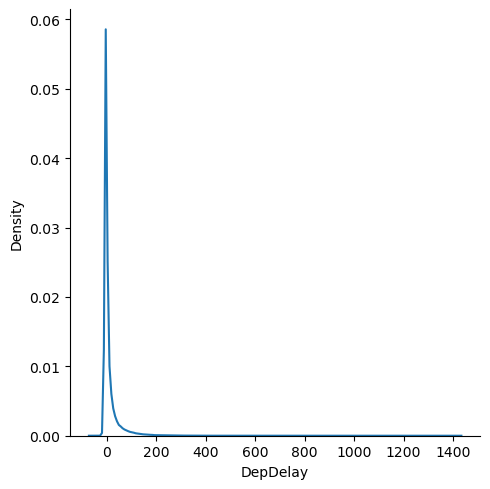

In [54]:
sns.displot(df_dd.DepDelay, kind='kde')

- Ciertamente existen valores considerados outliers dentro de la columna DepDelay

In [56]:
def removedor_outliers(df, col, k=1.5):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    filtro = (df[col] >= q1 - k*iqr) & (df[col] <= q3 + k*iqr)
    return df.loc[filtro, :]

/home/phiofs/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DepDelay'>

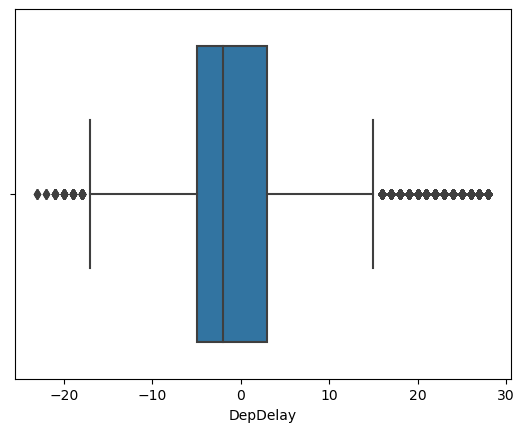

In [57]:
df_dd=removedor_outliers(df_dd, 'DepDelay', k=1.5) 

sns.boxplot(df_dd.DepDelay)

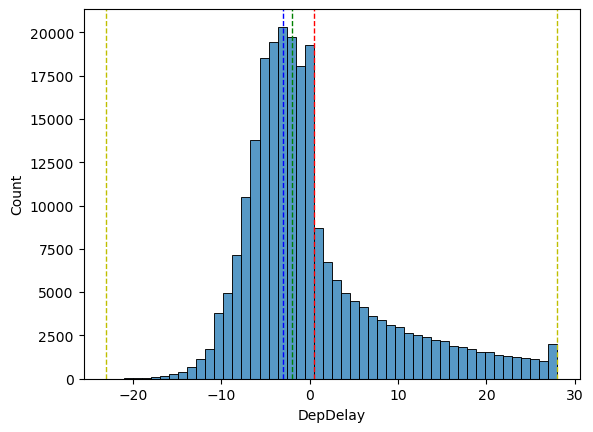

In [58]:
sns.histplot(df_dd.DepDelay, bins=50)
# colocar la media moda y mediana en el histograma
plt.axvline(df_dd.DepDelay.mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(df_dd.DepDelay.median(), color='g', linestyle='dashed', linewidth=1)
plt.axvline(df_dd.DepDelay.mode()[0], color='b', linestyle='dashed', linewidth=1)
plt.axvline(df_dd.DepDelay.max(), color='y', linestyle='dashed', linewidth=1)
plt.axvline(df_dd.DepDelay.min(), color='y', linestyle='dashed', linewidth=1)

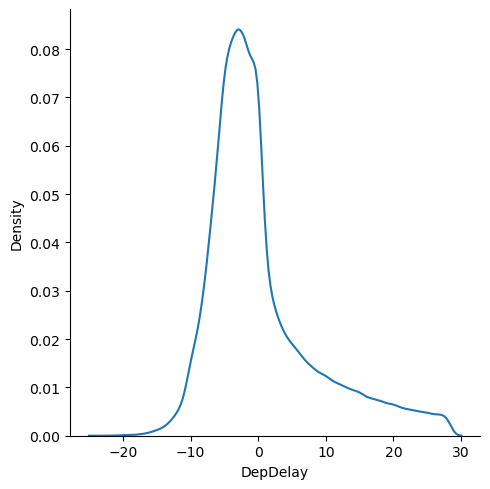

In [59]:
sns.displot(df_dd.DepDelay, kind='kde')

Debido a que tenemos que hacer esto de nuevo definire una funcion para hacerlo

In [90]:
def plot_outliers(df, col):
    fig, axs = plt.subplots(1,3, figsize = (25,5))
    sns.boxplot(df[col], ax=axs[0])
    sns.histplot(df[col], bins=50, ax=axs[1])
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode().values[0]
    max_value = df[col].max()
    min_value = df[col].min()
    axs[1].axvline(mean, color='r', linestyle='dashed', linewidth=1)
    axs[1].axvline(median, color='g', linestyle='dashed', linewidth=1)
    axs[1].axvline(mode, color='b', linestyle='dashed', linewidth=1)
    axs[1].axvline(max_value, color='y', linestyle='dashed', linewidth=1)
    axs[1].axvline(min_value, color='y', linestyle='dashed', linewidth=1)
    sns.kdeplot(df[col],ax=axs[2])
    plt.show()

/home/phiofs/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


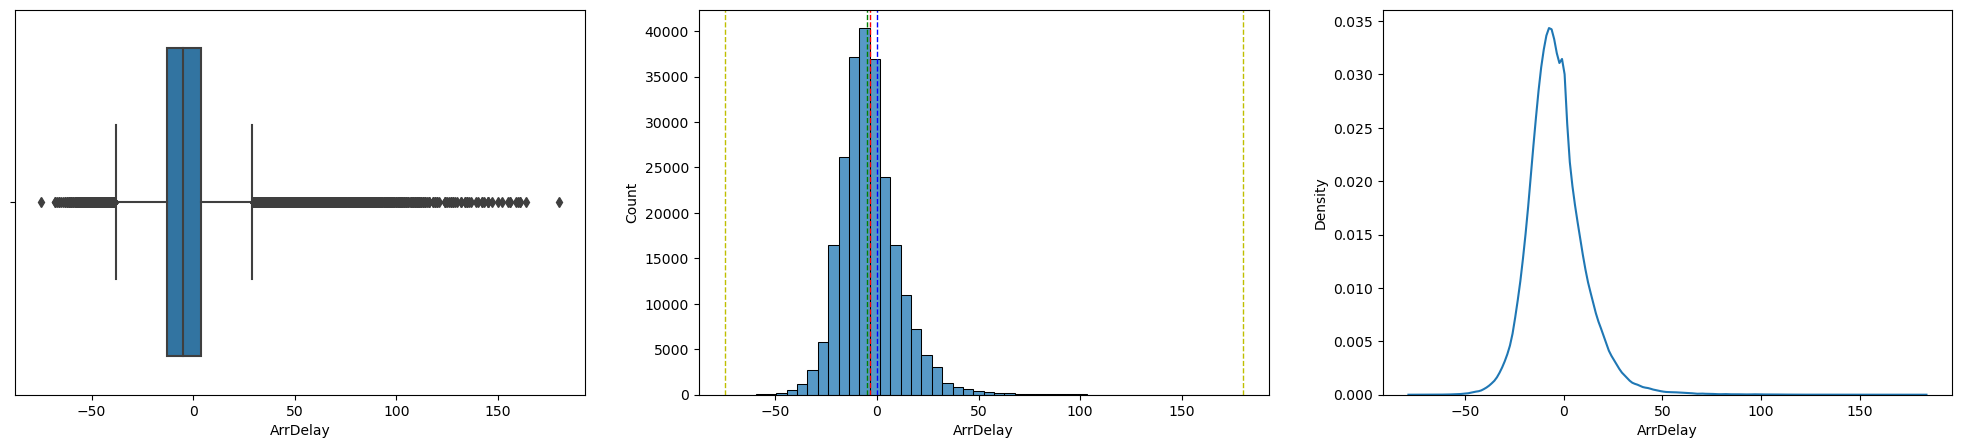

In [91]:
plot_outliers(df_dd,'ArrDelay')

/home/phiofs/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


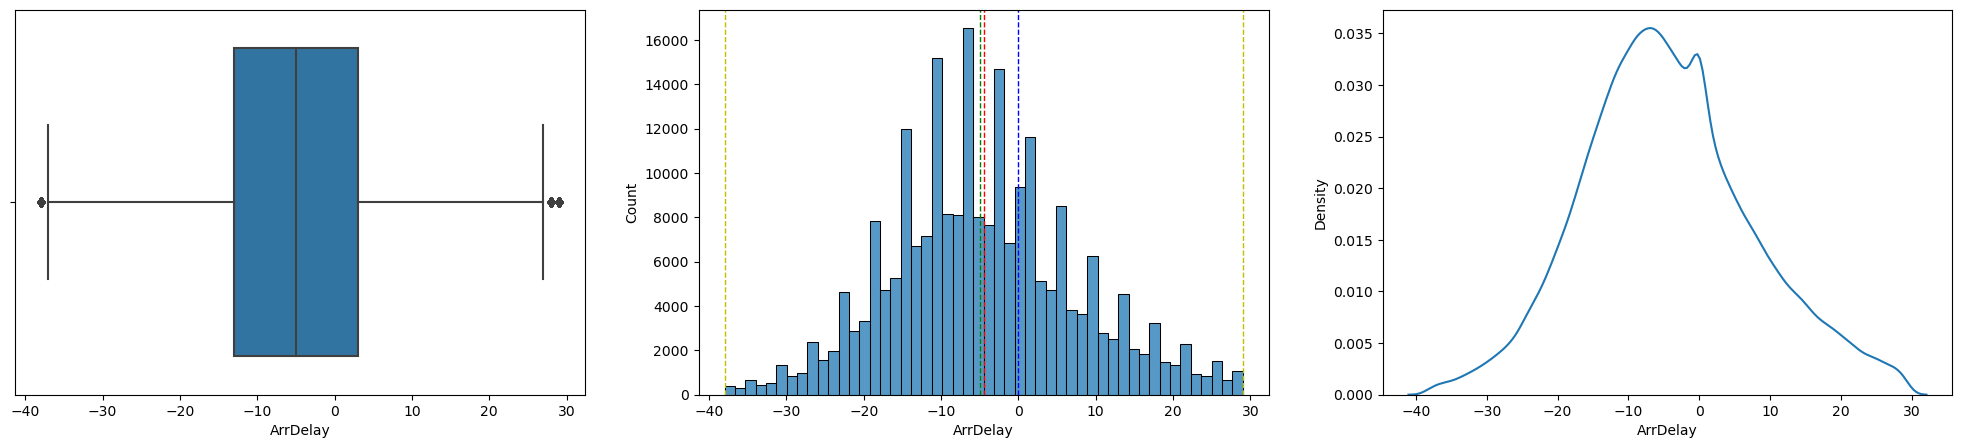

In [93]:
df_dd=removedor_outliers(df_dd, 'ArrDelay', k=1.5)
plot_outliers(df_dd,'ArrDelay')

In [94]:
# Analisis de dimension
df_dd.shape

(231247, 20)

Existe un cambio en la dimension por las celdas que fueron depuradas entonces queda completamente limpia la data. 

## Exploremos la data depurada

In [97]:
# Variables categricas
df_dd.describe(exclude='number')

,Carrier,OriginAirportName,OriginCity,OriginState,DestAirportName,DestCity,DestState
count,231247,231247,231247,231247,231247,231247,231247
unique,16,70,66,36,70,66,36
top,WN,Hartsfield-Jackson Atlanta International,Chicago,CA,Hartsfield-Jackson Atlanta International,Chicago,CA
freq,48963,12989,14219,33169,13096,14785,32074


In [98]:
df_dd.describe(include='number')

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,231247.0,231247.000000,231247.000000,231247.000000,231247.000000,231247.000000,231247.000000,231247.000000,231247.000000,231247.000000,231247.000000,231247.000000,231247.000000
mean,2013.0,7.021721,15.800490,3.904150,12756.934983,12737.101121,1291.456300,0.217659,0.076010,1473.366054,-4.505373,0.087020,0.012307
std,0.0,2.004542,8.851392,1.997062,1509.030249,1504.878492,470.252867,7.853408,0.265014,488.005050,12.098459,0.281864,0.110253
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-23.000000,0.000000,1.000000,-38.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,855.000000,-5.000000,0.000000,1100.000000,-13.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1247.000000,-2.000000,0.000000,1455.000000,-5.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1700.000000,3.000000,0.000000,1855.000000,3.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,28.000000,1.000000,2359.000000,29.000000,1.000000,1.000000


Fitting 109 distributions:  14%|█▍        | 15/109 [00:27<03:08,  2.01s/it]SKIPPED betaprime distribution (taking more than 30 seconds)
SKIPPED beta distribution (taking more than 30 seconds)
Fitting 109 distributions:  15%|█▍        | 16/109 [00:30<03:18,  2.14s/it]SKIPPED burr12 distribution (taking more than 30 seconds)
SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED crystalball distribution (taking more than 30 seconds)
Fitting 109 distributions:  25%|██▍       | 27/109 [00:57<03:59,  2.92s/it]SKIPPED gausshyper distribution (taking more than 30 seconds)
SKIPPED genexpon distribution (taking more than 30 seconds)
Fitting 109 distributions:  54%|█████▍    | 59/109 [02:00<01:40,  2.01s/it]SKIPPED kappa4 distribution (taking more than 30 seconds)
SKIPPED ksone distribution (taking more than 30 seconds)
Fitting 109 distributions:  84%|████████▍ | 92/109 [03:04<00:29,  1.73s/it]SKIPPED skewcauchy distribution (taking more than 30 seconds)
SKIPPED skewnorm distribution (t

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,0.105370,980.528596,-3.376534e+06,inf,0.104859,0.0
exponnorm,0.105480,1185.412819,-3.376279e+06,inf,0.093384,0.0
laplace,0.106275,964.669669,-3.374554e+06,inf,0.112220,0.0
alpha,0.108078,1435.064269,-3.370652e+06,inf,0.109016,0.0
gumbel_r,0.108657,1290.627152,-3.369430e+06,inf,0.117896,0.0


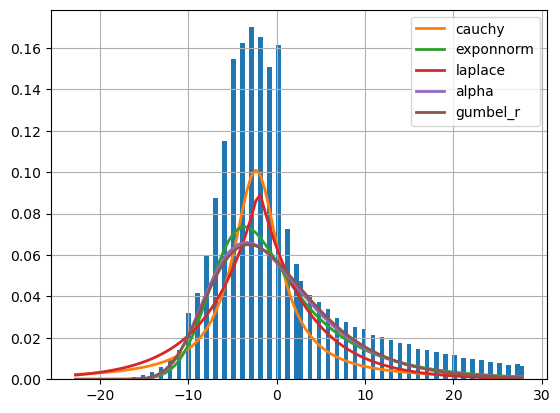

In [100]:
# usar fitter para ver la distribucion de las variables
f = Fitter(df_dd['DepDelay'])
f.fit()
f.summary()

Fitting 109 distributions:   3%|▎         | 3/109 [00:30<18:55, 10.71s/it]SKIPPED alpha distribution (taking more than 30 seconds)
SKIPPED beta distribution (taking more than 30 seconds)
Fitting 109 distributions:   4%|▎         | 4/109 [00:31<11:25,  6.53s/it]SKIPPED betaprime distribution (taking more than 30 seconds)
SKIPPED arcsine distribution (taking more than 30 seconds)
SKIPPED bradford distribution (taking more than 30 seconds)
Fitting 109 distributions:   7%|▋         | 8/109 [00:31<03:25,  2.04s/it]SKIPPED argus distribution (taking more than 30 seconds)
SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED burr12 distribution (taking more than 30 seconds)
Fitting 109 distributions:  17%|█▋        | 19/109 [01:01<03:30,  2.34s/it]SKIPPED exponnorm distribution (taking more than 30 seconds)
SKIPPED exponweib distribution (taking more than 30 seconds)
Fitting 109 distributions:  20%|██        | 22/109 [01:01<01:24,  1.03it/s]SKIPPED fatiguelife distribution (taking m

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
erlang,0.018299,949.707551,-3.781351e+06,inf,0.035200,2.228879e-249
logistic,0.018396,944.133842,-3.780138e+06,inf,0.033793,7.143406e-230
hypsecant,0.018525,944.472609,-3.778527e+06,inf,0.034026,4.885318e-233
norm,0.018568,941.947514,-3.777981e+06,inf,0.048366,0.000000e+00
dweibull,0.018981,946.757989,-3.772892e+06,inf,0.049063,0.000000e+00


/home/phiofs/anaconda3/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


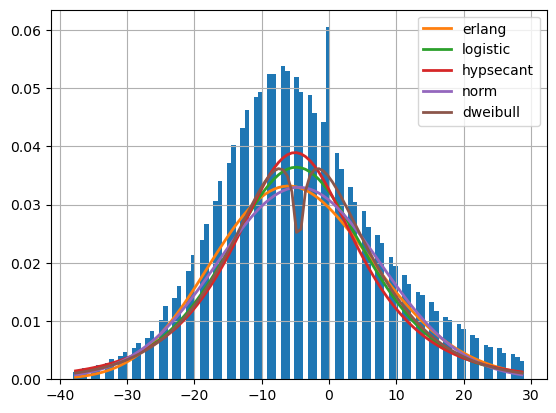

In [101]:
# usar fitter para ver la distribucion de las variables
from fitter import Fitter
f = Fitter(df_dd['ArrDelay'])
f.fit()
f.summary()

In [104]:
for i in ['DepDelay', 'ArrDelay']:
    print(stats.normaltest(df_dd[i]))

NormaltestResult(statistic=51254.38843030425, pvalue=0.0)
NormaltestResult(statistic=2278.8756116996924, pvalue=0.0)


### *What are the average (mean) departure and arrival delays?*

In [110]:
for i in ['DepDelay', 'ArrDelay']:
    print(f'La media de {i} es {df_dd[i].mean()} minutos y la desviacion estandar es {df_dd[i].std()} minutos')

La media de DepDelay es 0.21765903990105817 minutos y la desviacion estandar es 7.853407804733274 minutos
La media de ArrDelay es -4.50537304267731 minutos y la desviacion estandar es 12.098458524064762 minutos


### *How do the carriers compare in terms of arrival delay performance?*

<AxesSubplot:xlabel='Carrier', ylabel='ArrDelay'>

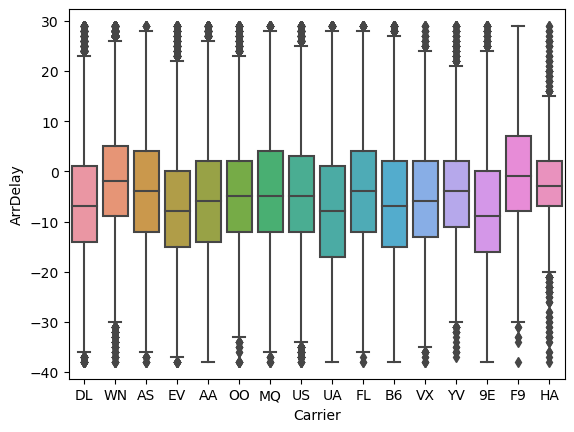

In [112]:
# Comparacion entre una variable categorica y una numerica
sns.boxplot(x='Carrier',y= 'ArrDelay', data=df_dd)

In [115]:
df_dd.groupby('Carrier')['ArrDelay'].mean().sort_values(ascending=False)

Carrier
F9   -0.097414
WN   -1.274779
HA   -2.538803
FL   -3.308431
YV   -3.622750
MQ   -3.755393
OO   -3.939554
US   -3.962736
AS   -4.281494
VX   -5.262368
AA   -5.458915
B6   -5.728547
DL   -6.275079
EV   -6.418824
9E   -7.487881
UA   -7.583730
Name: ArrDelay, dtype: float64

### *Is there a noticable difference in arrival delays for different days of the week?*

In [117]:
df_dd.groupby('DayOfWeek')['ArrDelay'].mean().sort_values(ascending=False)

DayOfWeek
4   -3.257212
5   -3.807781
3   -4.292989
1   -4.367383
7   -4.996028
2   -5.130754
6   -5.909817
Name: ArrDelay, dtype: float64

In [119]:
# realiza la prueba tukey para ver si hay diferencias significativas entre las medias
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df_dd['ArrDelay'], groups=df_dd['DayOfWeek'], alpha=0.05)
print(tukey)


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.7634    0.0 -1.0333 -0.4935   True
     1      3   0.0744 0.9838 -0.1954  0.3442  False
     1      4   1.1102    0.0  0.8372  1.3831   True
     1      5   0.5596    0.0  0.2867  0.8325   True
     1      6  -1.5424    0.0 -1.8283 -1.2565   True
     1      7  -0.6286    0.0 -0.9032 -0.3541   True
     2      3   0.8378    0.0  0.5678  1.1078   True
     2      4   1.8735    0.0  1.6005  2.1466   True
     2      5    1.323    0.0  1.0499   1.596   True
     2      6  -0.7791    0.0 -1.0651  -0.493   True
     2      7   0.1347 0.7767   -0.14  0.4095  False
     3      4   1.0358    0.0  0.7628  1.3088   True
     3      5   0.4852    0.0  0.2122  0.7582   True
     3      6  -1.6168    0.0 -1.9028 -1.3308   True
     3      7   -0.703    0.0 -0.9777 -0.4284   True
     4      5  -0.5506    0.0 -0.8266 -0.2745 

<AxesSubplot:xlabel='DayOfWeek', ylabel='ArrDelay'>

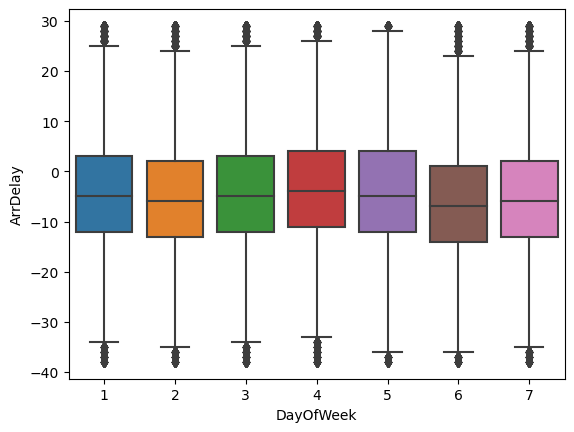

In [123]:
sns.boxplot(x='DayOfWeek',y= 'ArrDelay', data=df_dd)

### *Which departure airport has the highest average departure delay?*


In [126]:
# OriginAirportName and DepDelay
df_dd.groupby('OriginAirportName')['DepDelay'].mean().sort_values(ascending=False).head(5)

OriginAirportName
Chicago Midway International                            4.766591
Dallas Love Field                                       3.976457
William P Hobby                                         3.564986
Denver International                                    2.582640
Baltimore/Washington International Thurgood Marshall    2.412772
Name: DepDelay, dtype: float64

### *Do **late** departures tend to result in longer arrival delays than on-time departures?*

In [127]:
# Late >0 y ontime =0 

df_late= df_dd[df_dd.DepDelay>0]
df_ontime = df_dd[df_dd.DepDelay==0]


Como las dos siguen una distribucion normal entonces podemos hacer una correlacion

In [128]:
df_late.DepDelay.corr(df_late.ArrDelay)

0.5358129303865462

In [131]:
df_ontime.DepDelay.corr(df_ontime.ArrDelay)

nan

In [134]:
df_ontime.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

<AxesSubplot:xlabel='ArrDelay', ylabel='DepDelay'>

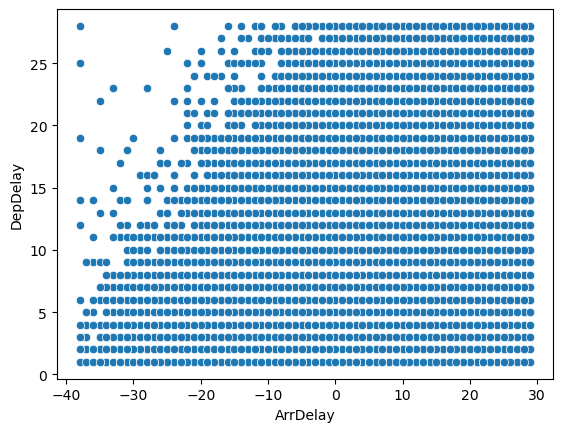

In [137]:
sns.scatterplot(x='ArrDelay', y='DepDelay', data=df_late)